In [1]:
import pandas as pd 
import numpy as nu
import matplotlib.pyplot as plt 

In [21]:
data = pd.read_csv("data/spam1.csv")

In [23]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [27]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [29]:
data.isna().sum()

Category    0
Message     0
dtype: int64

<Axes: xlabel='Category'>

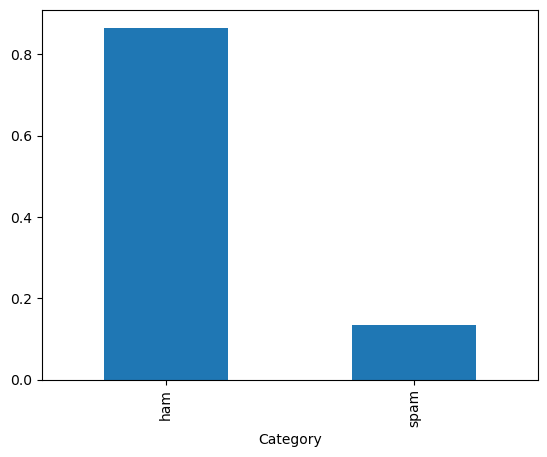

In [31]:
data.Category.value_counts(normalize = True).plot.bar()

In [33]:
X= data.Message
y = data.Category

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(max_features = 1500)
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(4457, 1500)

<h2> Model training and Evaluation whit logistic regression </h2>

In [79]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_cv, y_train)

LogisticRegression()

In [81]:
model.score(X_train_cv, y_train)

0.9811532420910927

In [83]:
X_test_cv = cv.transform(X_test)
model.score(X_test_cv, y_test)

0.9713004484304932

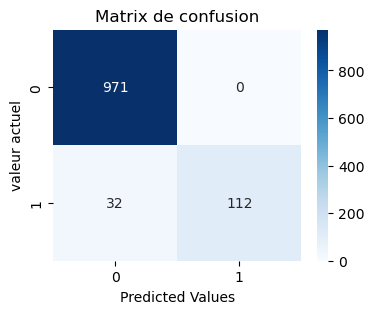

In [85]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test_cv)
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Values')
plt.ylabel('valeur actuel')
plt.grid(False)
plt.title("Matrix de confusion")
plt.show()

In [67]:
plt.save("m-confu.png")

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       971
        spam       1.00      0.78      0.88       144

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [89]:
import joblib

In [91]:
# Sauvegarder le modèle
joblib.dump(model, 'Email_spam_detection_logisticR.pkl')

['Email_spam_detection_logisticR.pkl']